In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import KFold
%matplotlib inline
import itertools

In [2]:
nursery = pd.read_csv("nursery_numerical.csv", sep=',')
nursery.head()

,Parents,Has_nurs,Form,Children,Housing,Finance,Social,Health,Class
0,1,1,1,1,1,1,1,1,recommend
1,1,1,1,1,1,1,1,2,not_recom
2,1,1,1,1,1,1,2,3,priority
3,1,1,1,1,1,1,3,1,priority
4,1,1,1,1,1,1,3,3,priority


In [3]:
poker = pd.read_csv("poker.csv", sep=',')
poker2 = poker.head(200000)
poker2.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [4]:
market = pd.read_csv("marketing_numerical.csv")
market.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Class
0,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.0,9
1,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.0,9
2,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.0,1
3,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.0,1
4,1,1.0,6,4.0,8.0,5.0,3,2.0,0,1.0,1.0,7.0,1.0,8


In [5]:
print(nursery.shape)
print(nursery.groupby('Class').size())

(12960, 9)
Class
 not_recom     4319
 priority      4266
 recommend        2
 spec_prior    4045
 very_recom     328
dtype: int64


In [6]:
print(poker2.shape)
print(poker2.groupby('Class').size())

(200000, 11)
Class
0    100293
1     84481
2      9607
3      4140
4       762
5       382
6       290
7        41
8         3
9         1
dtype: int64


In [7]:
print(market.shape)
print(market.groupby("Class").size())

(6876, 14)
Class
1    1255
2     529
3     505
4     618
5     527
6     846
7     784
8    1069
9     743
dtype: int64


In [8]:
data_nursery = nursery.iloc[:,0:8]
labels_nursery = nursery.iloc[:,8]

In [9]:
x = data_nursery.values.astype(np.float32) #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
nursery = pd.concat([df, labels_nursery], axis=1)

In [10]:
data_poker = poker2.iloc[:,0:10]
labelsPokernum = poker2.iloc[:,10]
labels_poker = pd.Series((str(i) for i in labelsPokernum))

In [11]:
x = data_poker.values.astype(np.float32) #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
poker2 = pd.concat([df, labels_poker], axis=1)

In [12]:
data_market = market.iloc[:,0:13]
labelsMarketnum = market.iloc[:,13]
labels_market = pd.Series((str(i) for i in labelsMarketnum))

In [13]:
x = data_market.values.astype(np.float32) #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
market = pd.concat([df, labels_market], axis=1)

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [15]:
kf = KFold(n_splits=2, shuffle=True)

## SVM for Nursery Dataset

/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

 very_recom       1.00      1.00      1.00      2166
   priority       0.95      0.96      0.95      2143
 spec_prior       0.00      0.00      0.00         2
  recommend       0.96      0.98      0.97      1984
  not_recom       0.93      0.62      0.74       185

avg / total       0.97      0.97      0.97      6480

('accuracy: ', 0.9695987654320988)


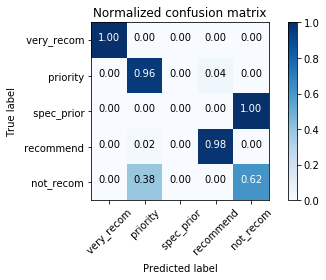

             precision    recall  f1-score   support

 very_recom       1.00      1.00      1.00      2153
   priority       0.96      0.96      0.96      2123
 spec_prior       0.96      0.97      0.97      2061
  not_recom       0.94      0.71      0.81       143

avg / total       0.97      0.97      0.97      6480

('accuracy: ', 0.9719135802469135)


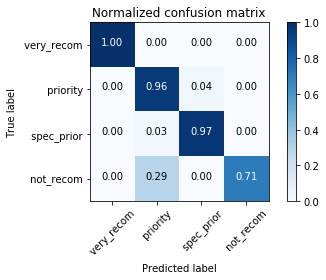

             precision    recall  f1-score   support

 very_recom       1.00      1.00      1.00      2143
   priority       0.96      0.95      0.95      2167
 spec_prior       0.00      0.00      0.00         1
  recommend       0.95      0.98      0.96      2021
  not_recom       0.89      0.70      0.78       148

avg / total       0.97      0.97      0.97      6480

('accuracy: ', 0.9680555555555556)


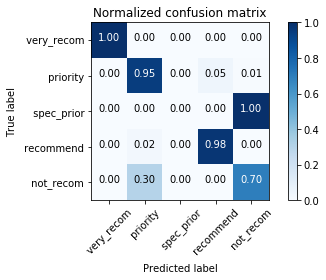

             precision    recall  f1-score   support

 very_recom       1.00      1.00      1.00      2176
   priority       0.95      0.97      0.96      2099
 spec_prior       0.00      0.00      0.00         1
  recommend       0.97      0.97      0.97      2024
  not_recom       0.97      0.64      0.78       180

avg / total       0.97      0.97      0.97      6480

('accuracy: ', 0.9725308641975309)


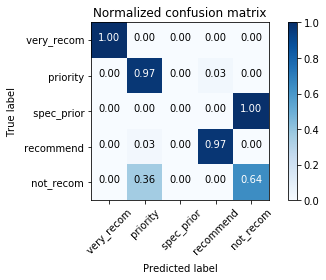

             precision    recall  f1-score   support

 very_recom       1.00      1.00      1.00      2198
   priority       0.94      0.96      0.95      2077
 spec_prior       0.00      0.00      0.00         2
  recommend       0.96      0.97      0.97      2035
  not_recom       0.92      0.62      0.74       168

avg / total       0.97      0.97      0.97      6480

('accuracy: ', 0.9686728395061729)


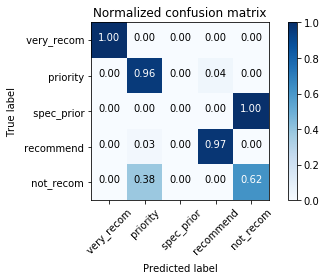

             precision    recall  f1-score   support

 very_recom       1.00      1.00      1.00      2121
   priority       0.96      0.95      0.96      2189
 spec_prior       0.95      0.98      0.97      2010
  not_recom       0.94      0.72      0.82       160

avg / total       0.97      0.97      0.97      6480

('accuracy: ', 0.971141975308642)


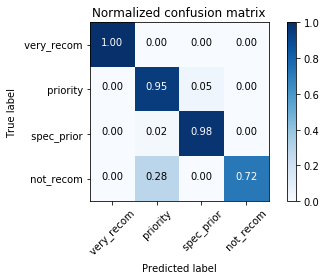

             precision    recall  f1-score   support

 very_recom       1.00      1.00      1.00      2144
   priority       0.95      0.97      0.96      2176
 spec_prior       0.97      0.97      0.97      1991
  not_recom       0.94      0.69      0.79       169

avg / total       0.97      0.97      0.97      6480

('accuracy: ', 0.9703703703703703)


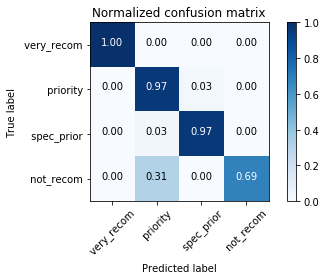

             precision    recall  f1-score   support

 very_recom       1.00      1.00      1.00      2175
   priority       0.96      0.96      0.96      2090
 spec_prior       0.00      0.00      0.00         2
  recommend       0.96      0.99      0.97      2054
  not_recom       0.96      0.68      0.79       159

avg / total       0.97      0.97      0.97      6480

('accuracy: ', 0.9742283950617284)


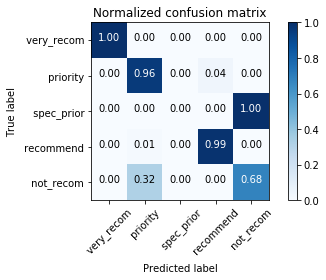

             precision    recall  f1-score   support

 very_recom       1.00      1.00      1.00      2158
   priority       0.95      0.95      0.95      2162
 spec_prior       0.96      0.97      0.96      1992
  not_recom       0.92      0.65      0.77       168

avg / total       0.97      0.97      0.97      6480

('accuracy: ', 0.9669753086419753)


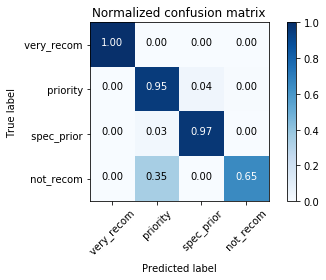

             precision    recall  f1-score   support

 very_recom       1.00      1.00      1.00      2161
   priority       0.95      0.97      0.96      2104
 spec_prior       0.00      0.00      0.00         2
  recommend       0.97      0.98      0.97      2053
  not_recom       0.93      0.70      0.80       160

avg / total       0.97      0.97      0.97      6480

('accuracy: ', 0.9736111111111111)


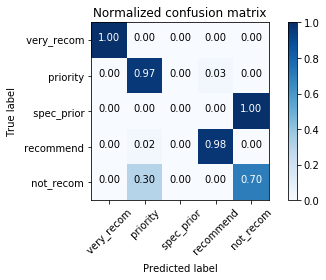

In [16]:
for i in range(5):
    for train_index, test_index in kf.split(nursery):
        X_train, X_test = data_nursery.iloc[train_index], data_nursery.iloc[test_index]
        y_train, y_test = labels_nursery[train_index], labels_nursery[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## SVM for Market

             precision    recall  f1-score   support

          1       0.54      0.82      0.65       652
          3       0.22      0.16      0.19       258
          2       0.26      0.13      0.17       261
          5       0.22      0.21      0.21       293
          4       0.17      0.06      0.09       268
          7       0.21      0.29      0.24       408
          6       0.27      0.12      0.17       399
          9       0.31      0.46      0.37       525
          8       0.48      0.29      0.36       374

avg / total       0.33      0.35      0.32      3438

('accuracy: ', 0.3510762070971495)


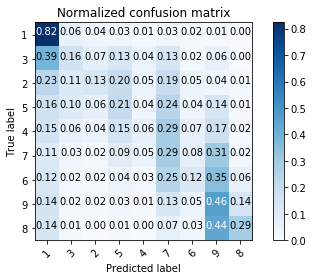

             precision    recall  f1-score   support

          1       0.50      0.82      0.63       603
          3       0.24      0.13      0.16       271
          2       0.21      0.16      0.18       244
          5       0.22      0.15      0.18       325
          4       0.11      0.07      0.08       259
          7       0.25      0.26      0.25       438
          6       0.26      0.18      0.21       385
          9       0.34      0.46      0.39       544
          8       0.45      0.32      0.38       369

avg / total       0.31      0.35      0.32      3438

('accuracy: ', 0.34642233856893545)


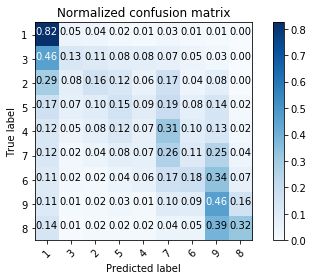

             precision    recall  f1-score   support

          1       0.48      0.84      0.61       617
          3       0.22      0.10      0.14       277
          2       0.16      0.12      0.14       247
          5       0.23      0.15      0.18       330
          4       0.12      0.01      0.01       274
          7       0.22      0.30      0.25       410
          6       0.18      0.08      0.11       392
          9       0.30      0.45      0.36       532
          8       0.40      0.31      0.35       359

avg / total       0.28      0.33      0.28      3438

('accuracy: ', 0.3298429319371728)


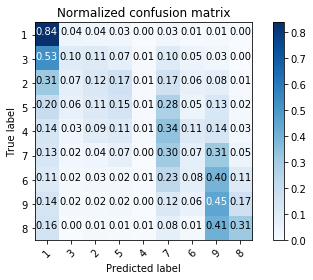

             precision    recall  f1-score   support

          1       0.55      0.80      0.65       638
          3       0.20      0.17      0.18       252
          2       0.19      0.09      0.12       258
          5       0.19      0.21      0.20       288
          4       0.16      0.06      0.09       253
          7       0.25      0.26      0.25       436
          6       0.24      0.16      0.19       392
          9       0.30      0.46      0.36       537
          8       0.50      0.24      0.33       384

avg / total       0.32      0.34      0.31      3438

('accuracy: ', 0.34089586969168123)


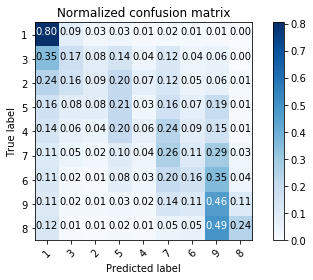

             precision    recall  f1-score   support

          1       0.53      0.82      0.64       663
          3       0.18      0.08      0.11       273
          2       0.19      0.15      0.17       249
          5       0.19      0.15      0.17       325
          4       0.19      0.13      0.16       245
          7       0.22      0.24      0.23       407
          6       0.22      0.13      0.16       380
          9       0.32      0.47      0.38       524
          8       0.50      0.33      0.40       372

avg / total       0.32      0.35      0.32      3438

('accuracy: ', 0.34874927283304247)


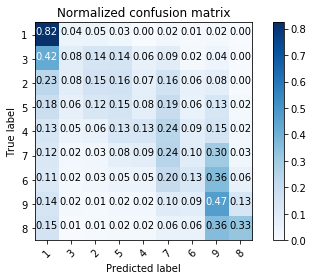

             precision    recall  f1-score   support

          1       0.50      0.83      0.63       592
          3       0.20      0.15      0.17       256
          2       0.17      0.08      0.11       256
          5       0.19      0.18      0.19       293
          4       0.14      0.02      0.04       282
          7       0.21      0.29      0.25       439
          6       0.24      0.13      0.17       404
          9       0.33      0.48      0.39       545
          8       0.47      0.28      0.35       371

avg / total       0.30      0.34      0.30      3438

('accuracy: ', 0.33507853403141363)


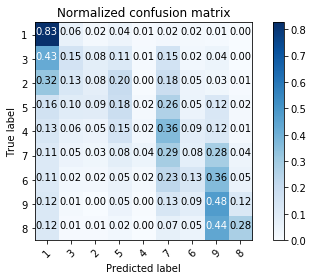

             precision    recall  f1-score   support

          1       0.49      0.85      0.62       595
          3       0.16      0.09      0.12       254
          2       0.17      0.11      0.13       254
          5       0.21      0.13      0.16       315
          4       0.15      0.06      0.08       261
          7       0.20      0.25      0.22       419
          6       0.22      0.12      0.15       396
          9       0.32      0.51      0.39       550
          8       0.50      0.26      0.34       394

avg / total       0.30      0.33      0.29      3438

('accuracy: ', 0.33304246655031994)


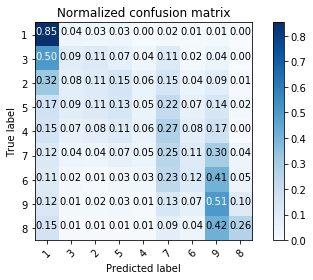

             precision    recall  f1-score   support

          1       0.54      0.79      0.64       660
          3       0.22      0.14      0.17       275
          2       0.20      0.13      0.16       251
          5       0.20      0.21      0.20       303
          4       0.18      0.07      0.10       266
          7       0.21      0.25      0.22       427
          6       0.24      0.13      0.17       388
          9       0.32      0.47      0.38       519
          8       0.45      0.30      0.36       349

avg / total       0.31      0.34      0.32      3438

('accuracy: ', 0.34293193717277487)


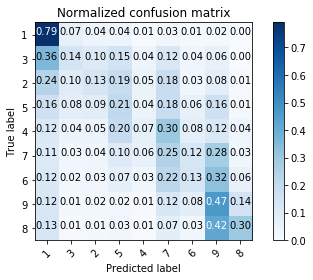

             precision    recall  f1-score   support

          1       0.52      0.83      0.64       637
          3       0.22      0.14      0.17       266
          2       0.14      0.09      0.11       246
          5       0.23      0.22      0.23       297
          4       0.14      0.10      0.11       264
          7       0.21      0.20      0.20       439
          6       0.20      0.11      0.15       396
          9       0.32      0.49      0.38       518
          8       0.51      0.23      0.32       375

avg / total       0.31      0.34      0.30      3438

('accuracy: ', 0.335369400814427)


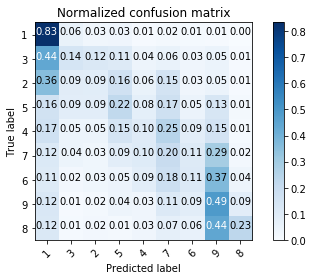

             precision    recall  f1-score   support

          1       0.51      0.79      0.62       618
          3       0.20      0.11      0.15       263
          2       0.20      0.09      0.12       259
          5       0.25      0.19      0.22       321
          4       0.18      0.03      0.05       263
          7       0.17      0.27      0.21       407
          6       0.26      0.15      0.19       388
          9       0.33      0.45      0.38       551
          8       0.45      0.36      0.40       368

avg / total       0.31      0.34      0.30      3438

('accuracy: ', 0.3365328679464805)


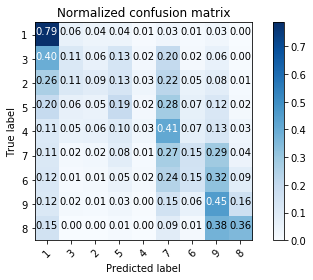

In [17]:
for i in range(5):
    for train_index, test_index in kf.split(market):
        X_train, X_test = data_market.iloc[train_index], data_market.iloc[test_index]
        y_train, y_test = labels_market[train_index], labels_market[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## SVM for Poker Dataset

             precision    recall  f1-score   support

          1       0.65      0.76      0.70     50315
          0       0.56      0.56      0.56     42107
          3       0.49      0.01      0.01      4729
          2       0.14      0.00      0.00      2132
          5       0.00      0.00      0.00       357
          4       0.00      0.00      0.00       197
          7       0.00      0.00      0.00       141
          6       0.00      0.00      0.00        22

avg / total       0.59      0.62      0.59    100000

('accuracy: ', 0.61636)


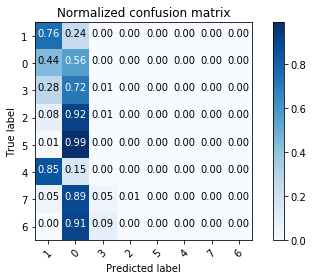

             precision    recall  f1-score   support

          1       0.65      0.76      0.70     49978
          0       0.56      0.55      0.56     42374
          3       0.42      0.01      0.01      4878
          2       0.00      0.00      0.00      2008
          5       0.00      0.00      0.00       405
          4       0.00      0.00      0.00       185
          7       0.00      0.00      0.00       149
          6       0.00      0.00      0.00        19
          9       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         1

avg / total       0.58      0.61      0.59    100000

('accuracy: ', 0.61276)


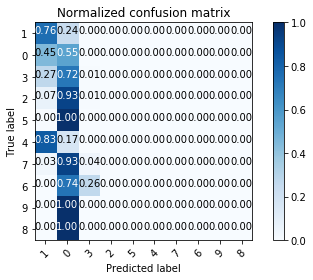

             precision    recall  f1-score   support

          1       0.65      0.75      0.70     50067
          0       0.56      0.56      0.56     42278
          3       0.39      0.00      0.01      4780
          2       0.20      0.00      0.00      2103
          5       0.00      0.00      0.00       404
          4       0.00      0.00      0.00       188
          7       0.00      0.00      0.00       158
          6       0.00      0.00      0.00        21
          8       0.00      0.00      0.00         1

avg / total       0.59      0.61      0.59    100000

('accuracy: ', 0.61472)


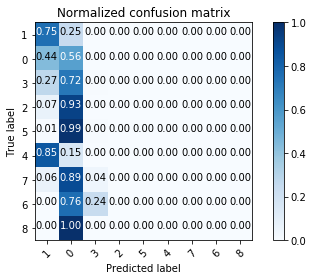

             precision    recall  f1-score   support

          1       0.65      0.76      0.70     50226
          0       0.57      0.56      0.56     42203
          3       0.45      0.01      0.01      4827
          2       0.50      0.00      0.00      2037
          5       0.00      0.00      0.00       358
          4       0.00      0.00      0.00       194
          7       0.00      0.00      0.00       132
          6       0.00      0.00      0.00        20
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.60      0.62      0.59    100000

('accuracy: ', 0.6169)


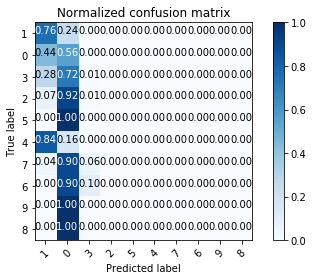

             precision    recall  f1-score   support

          1       0.65      0.76      0.70     49851
          0       0.56      0.55      0.56     42548
          3       0.46      0.00      0.01      4788
          2       0.15      0.00      0.00      2071
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       206
          7       0.00      0.00      0.00       137
          6       0.00      0.00      0.00        16
          8       0.00      0.00      0.00         2

avg / total       0.59      0.61      0.58    100000

('accuracy: ', 0.61153)


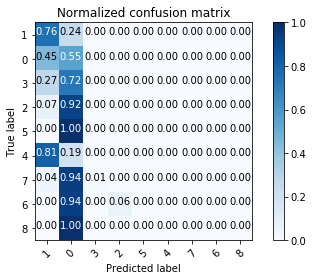

             precision    recall  f1-score   support

          1       0.66      0.75      0.70     50442
          0       0.56      0.56      0.56     41933
          3       0.30      0.00      0.01      4819
          2       0.31      0.00      0.00      2069
          5       0.00      0.00      0.00       381
          4       0.00      0.00      0.00       176
          7       0.00      0.00      0.00       153
          6       0.00      0.00      0.00        25
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.59      0.62      0.59    100000

('accuracy: ', 0.61547)


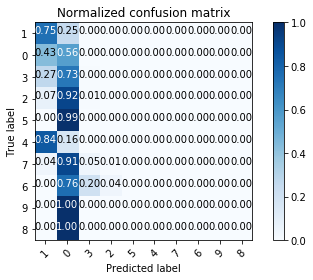

             precision    recall  f1-score   support

          1       0.65      0.76      0.70     50160
          0       0.56      0.56      0.56     42144
          3       0.38      0.01      0.01      4812
          2       0.33      0.00      0.00      2118
          5       0.00      0.00      0.00       386
          4       0.00      0.00      0.00       206
          7       0.00      0.00      0.00       154
          6       0.00      0.00      0.00        18
          9       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1

avg / total       0.59      0.61      0.59    100000

('accuracy: ', 0.61498)


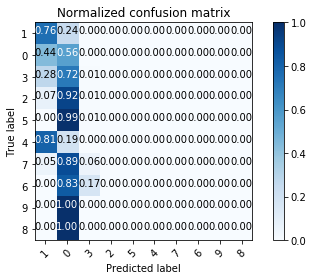

             precision    recall  f1-score   support

          1       0.65      0.75      0.70     50133
          0       0.56      0.56      0.56     42337
          3       0.36      0.00      0.01      4795
          2       0.00      0.00      0.00      2022
          5       0.00      0.00      0.00       376
          4       0.00      0.00      0.00       176
          7       0.00      0.00      0.00       136
          6       0.00      0.00      0.00        23
          8       0.00      0.00      0.00         2

avg / total       0.58      0.61      0.59    100000

('accuracy: ', 0.61404)


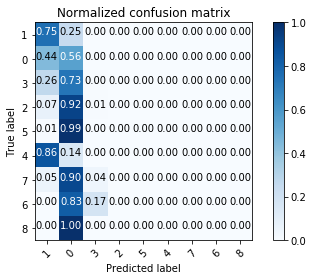

             precision    recall  f1-score   support

          1       0.65      0.76      0.70     49936
          0       0.56      0.55      0.56     42337
          3       0.41      0.00      0.01      4856
          2       0.00      0.00      0.00      2060
          5       0.00      0.00      0.00       407
          4       0.00      0.00      0.00       221
          7       0.00      0.00      0.00       159
          6       0.00      0.00      0.00        21
          9       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1

avg / total       0.58      0.61      0.59    100000

('accuracy: ', 0.61221)


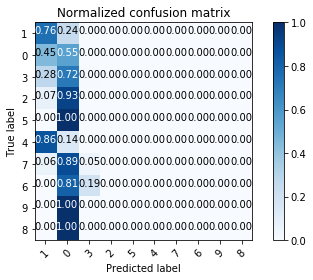

             precision    recall  f1-score   support

          1       0.65      0.75      0.70     50357
          0       0.56      0.56      0.56     42144
          3       0.45      0.01      0.01      4751
          2       0.00      0.00      0.00      2080
          5       0.00      0.00      0.00       355
          4       0.00      0.00      0.00       161
          7       0.00      0.00      0.00       131
          6       0.00      0.00      0.00        20
          8       0.00      0.00      0.00         1

avg / total       0.59      0.61      0.59    100000

('accuracy: ', 0.61379)


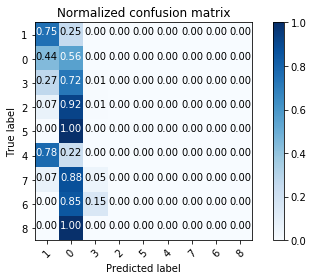

In [18]:
for i in range(5):
    for train_index, test_index in kf.split(poker2):
        X_train, X_test = data_poker.iloc[train_index], data_poker.iloc[test_index]
        y_train, y_test = labels_poker[train_index], labels_poker[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [ ]:
# import csv
# printinacc=[]
# with open('MarketingAcc.csv', "w") as output:
#     writer = csv.writer(output, lineterminator='\n')
#     for val in printinacc:
#         writer.writerow(val)  